 **Regression Analysis: Simplify complex data relationships**

### The purpose of this project:

The goal is to build a logistic regression model and evaluate the model.
This activity has three parts:

**Part 1**: EDA & Checking Model Assumptions. \
The purposes of EDA before constructing a logistic regression model are: \
    1. To identify data anomalies such as outliers and class imbalance that might affect the modeling. \
    2. To verify model assumptions such as no severe multicollinearity.

**Part 2**: Model Building and Evaluation

**Part 3**: Interpreting Model Results


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('tiktok_dataset.csv')

In [3]:
data.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0


In [14]:
# Get number of rows and columns :
data.shape

(19084, 12)

In [15]:
# Get data types of columns :
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [16]:
# Get basic information :
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19084 entries, 0 to 19083
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19084 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19084 non-null  int64  
 3   video_duration_sec        19084 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19084 non-null  object 
 6   author_ban_status         19084 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [18]:
# Generate basic descriptive stats :
data.describe().T

,count,mean,std,min,25%,50%,75%,max
#,19084.0,9.542500e+03,5.509221e+03,1.000000e+00,4.771750e+03,9.542500e+03,1.431325e+04,1.908400e+04
video_id,19084.0,5.624840e+09,2.537030e+09,1.234959e+09,3.425100e+09,5.609500e+09,7.840823e+09,9.999873e+09
video_duration_sec,19084.0,3.242381e+01,1.622647e+01,5.000000e+00,1.800000e+01,3.200000e+01,4.700000e+01,6.000000e+01
video_view_count,19084.0,2.547086e+05,3.228933e+05,2.000000e+01,4.942500e+03,9.954500e+03,5.043270e+05,9.998170e+05
video_like_count,19084.0,8.430464e+04,1.334205e+05,0.000000e+00,8.107500e+02,3.403500e+03,1.250200e+05,6.578300e+05
video_share_count,19084.0,1.673525e+04,3.203617e+04,0.000000e+00,1.150000e+02,7.170000e+02,1.822200e+04,2.561300e+05
video_download_count,19084.0,1.049430e+03,2.004300e+03,0.000000e+00,7.000000e+00,4.600000e+01,1.156250e+03,1.499400e+04
video_comment_count,19084.0,3.493121e+02,7.996389e+02,0.000000e+00,1.000000e+00,9.000000e+00,2.920000e+02,9.599000e+03


In [19]:
# Check for missing values:
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [20]:
# Drop rows with missing values :
data = data.dropna(axis=0)

In [21]:
# Display first few rows after handling missing values :
data.head(2)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0


In [22]:
# Check for duplicates :
data.duplicated().sum()

0

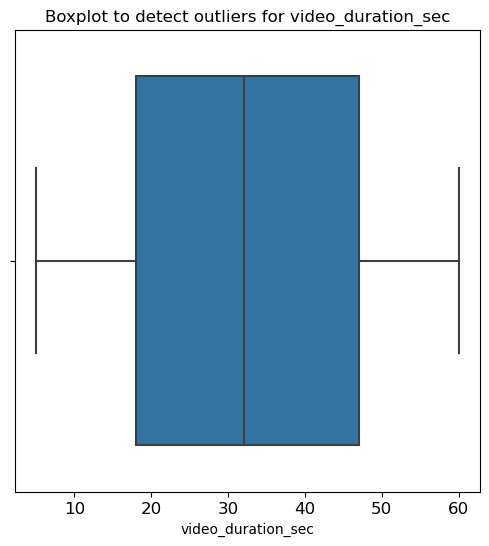

In [23]:
# Create a boxplot to visualize distribution of `video_duration_sec` :
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for video_duration_sec',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data.video_duration_sec)
plt.show()

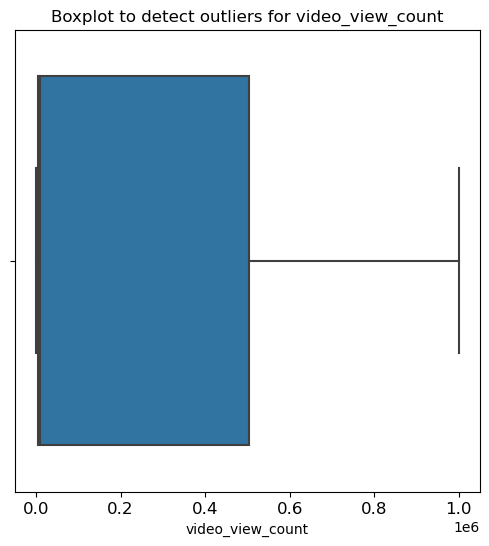

In [24]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

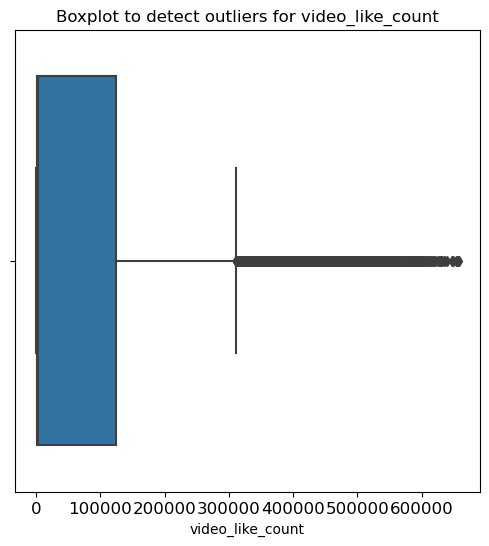

In [25]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

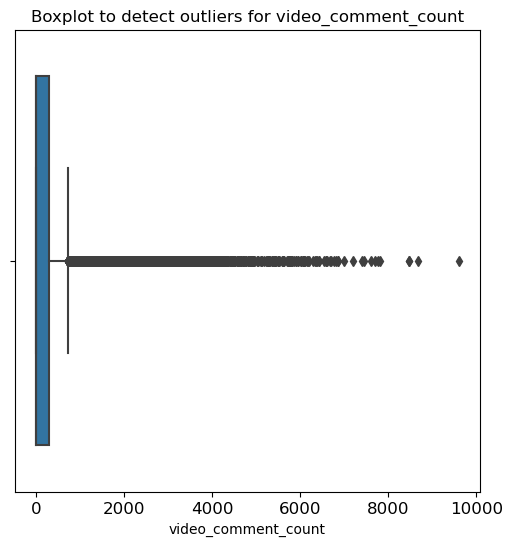

In [26]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

In [30]:
# Check for and handle outliers
percentile25 = data.video_comment_count.quantile(0.25)
percentile75 = data.video_comment_count.quantile(0.75)
iqr = percentile75-percentile25
upper_limit = percentile75+1.5*iqr
data.loc[data.video_comment_count > upper_limit ,'video_comment_count'] = upper_limit

In [31]:
# Check for class imbalance :
data.verified_status.value_counts(normalize=True)

not verified    0.93712
verified        0.06288
Name: verified_status, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

In [33]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data.verified_status == 'not verified']
data_minority = data[data.verified_status == 'verified']

# Upsmaple the minority class ('which is 'verified')
data_minority_upsampled = resample(data_minority,
                                   replace=True,                 # to sample with replacement.
                                   n_samples=len(data_majority), # to amtch majority class
                                   random_state=0)               # to create reproductible results

data_upsampled = pd.concat([data_majority,data_minority_upsampled]).reset_index(drop=True)
data_upsampled.verified_status.value_counts()

not verified    17884
verified        17884
Name: verified_status, dtype: int64

Getting the average video_transcription_text length for videos posted by verified accounts and the average video_transcription_text length for videos posted by unverified accounts.

In [41]:
data_upsampled[['verified_status','video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(func= lambda array: np.mean([len(i) for i in array]))                 

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [42]:
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].apply(func=lambda text: len(text))

In [43]:
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [44]:
data_upsampled.columns

Index(['#', 'claim_status', 'video_id', 'video_duration_sec',
       'video_transcription_text', 'verified_status', 'author_ban_status',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count', 'text_length'],
      dtype='object')

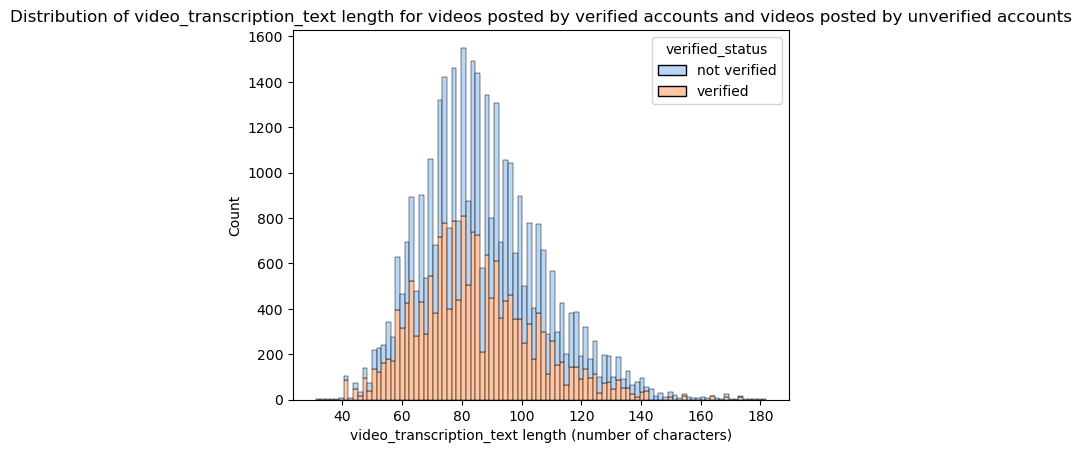

In [46]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data= data_upsampled,stat='count',multiple='stack',x='text_length',kde=False, palette='pastel', hue='verified_status',element='bars',legend=True)
plt.title('Seaborn Stacked Histogram')
plt.xlabel('video_transcription_text length (number of characters)')
plt.ylabel('Count')
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [48]:
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.608773,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.012674,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.001086,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.748361,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.780900,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.671335,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.793668,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.780900,0.671335,0.793668,1.000000,0.217661
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.217661,1.000000


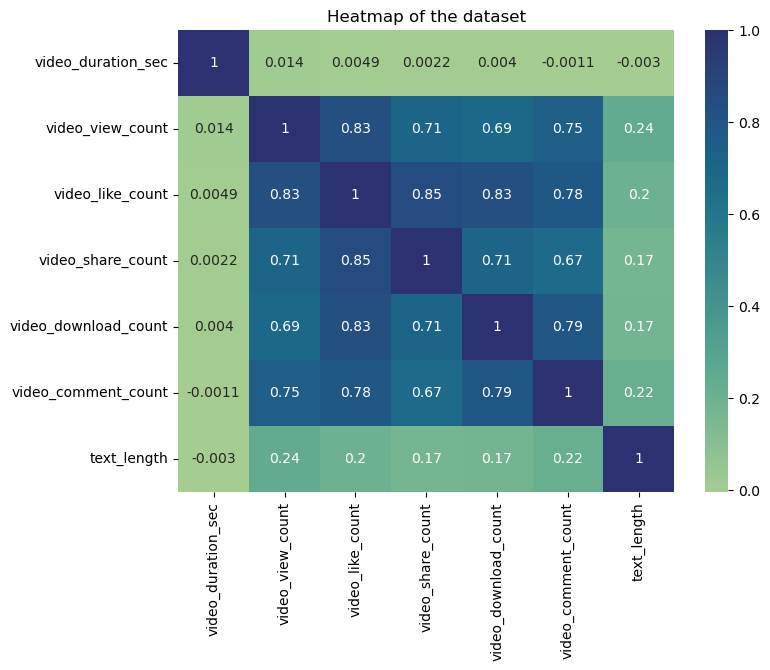

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True), annot=True, cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

The above heatmap shows that the following pair of variables are strongly correlated: video_view_count and video_like_count (0.85 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude video_like_count. And among the variables that quantify video metrics, you could keep video_view_count, video_share_count, video_download_count, and video_comment_count as features.

**After analysis and deriving variables with close relationships, it is time to begin constructing the model.**

In [51]:
y = data_upsampled.verified_status
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [53]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [54]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [55]:
# Get unique values in `claim_status`
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [56]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

In [57]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [63]:
X_encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [66]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [67]:
X_train_encoded_df = pd.DataFrame(data=X_train_encoded,columns=X_encoder.get_feature_names_out())
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [68]:
X_train.drop(columns=['claim_status','author_ban_status']).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [69]:
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [70]:
y_train.dtype

dtype('O')

In [71]:
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [72]:
y_encoder = OneHotEncoder(drop='first', sparse=False)

In [76]:
y_train = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

In [77]:
y_train

array([1., 1., 1., ..., 1., 1., 0.])

In [78]:
log_clf = LogisticRegression(random_state=0,max_iter=800).fit(X_train_final,y_train_final)

In [79]:
X_test_to_encode = X_test[['claim_status','author_ban_status']]
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [80]:
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.0,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.0,0.0,1.0,0.0,0.0
2,31,449767.0,75385.0,5956.0,728.5,0.0,0.0,0.0
3,19,792813.0,56597.0,5146.0,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0


In [81]:
y_pred = log_clf.predict(X_test_final)

In [82]:
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

In [83]:
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

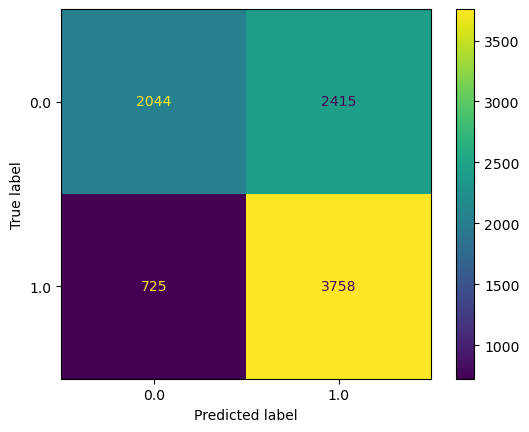

In [84]:
log_cm = confusion_matrix(y_test_final,y_pred,labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

In [85]:
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.46      0.57      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.64      8942
weighted avg       0.67      0.65      0.64      8942



**Interpret model coefficients**

In [86]:
pd.DataFrame(data={'Feature_Names' : log_clf.feature_names_in_,'Model_Coefficient' : log_clf.coef_[0]})

,Feature_Names,Model_Coefficient
0,video_duration_sec,8.607893e-03
1,video_view_count,-2.132079e-06
2,video_share_count,5.930971e-06
3,video_download_count,-1.099775e-05
4,video_comment_count,-6.404235e-04
5,claim_status_opinion,3.908384e-04
6,author_ban_status_banned,-1.781741e-05
7,author_ban_status_under review,-9.682447e-07


1. The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop video_like_count from the model building. 
2. Based on the logistic regression model, each additional second of the video is associated with 0.01 increase in the log-odds of the user having a verified status. 
3. The logistic regression model had decent predictive power: a precision of 69% and a recall of 66% (weighted averages), and it achieved an accuracy of 66%.